In [1]:
import numpy as np
import scipy as scipy
from scipy.sparse import random
from scipy.sparse.linalg import svds
from timeit import default_timer as timer
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [2]:
def lplot(Ys,labels=['1','2','3','4','5','6'],ylabel='Function value'):
    """Line plot of the Y values. (Same as above, but no animation).
    Ys is a list where each element is an array of numbers to plot.
    """
    colors = ['blue','red','green','black','cyan','purple','pink']
    fig, ax = plt.subplots(figsize=(6,6))
    T = len(Ys[0])
    plt.yscale('log')
    handles = []
    for i in range(len(Ys)):
        handles.append(Line2D([0], [0], color=colors[i], label=labels[i]))
    plt.legend(handles = handles, loc = 'upper right')
    plt.xlabel('Iterations')
    plt.ylabel(ylabel)
    plt.title('Iterations vs Error')
    for j in range(len(Ys)):
        plt.plot(range(T),Ys[j][:T],color=colors[j],marker='o')

np.random.seed(2021)

In [3]:
# loss function
def cost(X,Y,O):
    return np.linalg.norm(np.multiply(X-Y, O),'fro')**2
    
# gradient of loss function
def loss_gradient(X,Y,O):
    return np.multiply(-2*(X-Y),O)
  
# parameters and generating O and X
n = 1000
d = 500
p = 0.1
R = np.random.rand(n,d)
O = np.zeros((n,d))
O[R < p] = 1
# print(O)

k = 5
U = np.random.normal(0,1,(n,k))
V = np.random.normal(0,1,(d,k))
X = np.matmul(U,np.transpose(V))
# print(X)

In [4]:
# function for singular value projection
# compute and plot the losses for X0, X1,...,XT
# use output of svd function to put together XT
# O is the matrix that tells us what values of Y we know, and Y is our approximation

def svp(step, X, T):
    X_0 = np.random.normal(0,1,(n,d))
    approximations = [X_0]
    error = [cost(X,X_0,O)]
    for t in range(T):
        Y_t = approximations[t]-(step*loss_gradient(X, approximations[t], O))
        u,s,v = scipy.sparse.linalg.svds(Y_t, k = 5)
        X_t = u @ np.diag(s) @ v
        approximations.append(X_t)
        error.append(cost(X,X_t,O))
    return [approximations, error]


In [5]:
svp_1 = svp(0.1,X,150)
svp_2 = svp(0.25,X,150)
svp_3 = svp(0.5,X,150)

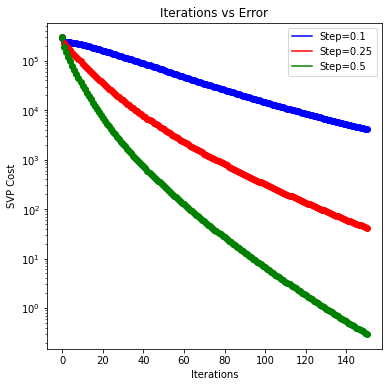

In [6]:
four_labels = ["Step=0.1", "Step=0.25", "Step=0.5"]
cost_func = [svp_1[1],svp_2[1],svp_3[1]]
lplot(cost_func,four_labels,'SVP Cost')

In [7]:
n = 10000
k = 20
p = 0.01

def power_iteration(U,Ut,G,v0,T):
    vs = [v0]
    v = v0
    for i in range(T):
        u = Ut.dot(v)
        u = U.dot(u)
        g = G.dot(v)
        v = (u+g)/np.linalg.norm(u+g)
        vs.append(v)
    return np.array(vs)

G = random(n, n, density=p)
U = np.random.rand(n, k)
U_transpose = U.transpose()
Z = np.dot(U,U_transpose) + G.A


In [8]:
v0 = np.random.normal(0,1,(n,1))
v0 = v0/np.linalg.norm(v0)

func = 0
func_times = []
for x in range(10):
    start = timer()
    utrue,strue,vtrue = svds(Z,k=1)
    end = timer()
    func += (end-start)
    
func /= 10
arr = np.full(10,func)
func_times = [str(round(f, 4)) + "s" for f in arr]

our_times = []
pi_output = []
for t in range(10, 110, 10):
    power = 0
    for x in range(10):
        start = timer()
        pi = power_iteration(U,U_transpose,G.A,v0,t)
        end = timer()
        power += (end-start)
    power /= 10
    pi_output.append(pi)
    our_times.append(str(round(power, 4)) + "s")



In [9]:
info = {'Iterations': [10,20,30,40,50,60,70,80,90,100],'Built-In': func_times, 'Power Iteration': our_times}

print(tabulate(info, headers='keys', tablefmt='fancy_grid'))


╒══════════════╤════════════╤═══════════════════╕
│   Iterations │ Built-In   │ Power Iteration   │
╞══════════════╪════════════╪═══════════════════╡
│           10 │ 1.0004s    │ 0.3957s           │
├──────────────┼────────────┼───────────────────┤
│           20 │ 1.0004s    │ 0.4955s           │
├──────────────┼────────────┼───────────────────┤
│           30 │ 1.0004s    │ 0.5814s           │
├──────────────┼────────────┼───────────────────┤
│           40 │ 1.0004s    │ 0.7139s           │
├──────────────┼────────────┼───────────────────┤
│           50 │ 1.0004s    │ 0.8492s           │
├──────────────┼────────────┼───────────────────┤
│           60 │ 1.0004s    │ 1.0208s           │
├──────────────┼────────────┼───────────────────┤
│           70 │ 1.0004s    │ 1.391s            │
├──────────────┼────────────┼───────────────────┤
│           80 │ 1.0004s    │ 1.5173s           │
├──────────────┼────────────┼───────────────────┤
│           90 │ 1.0004s    │ 1.7037s           │


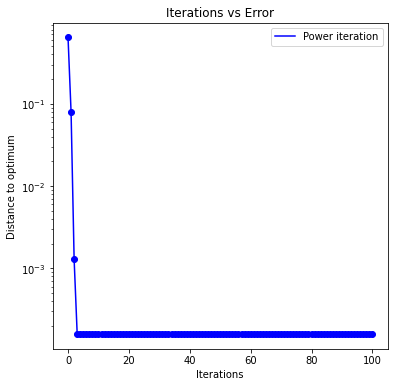

In [10]:

distances1 = []
s1 = []

dist_pi= [np.linalg.norm(np.abs(v) - np.abs(vtrue.transpose())) for v in pi_output[9]]
distances1.append(dist_pi)
s1.append('Power iteration')


lplot(distances1,s1,'Distance to optimum')
